In [1]:
# Disable TensorFlow debugging info and warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2: Info and warnings not displayed 

In [2]:
import pathlib
import tensorflow as tf

In [3]:
# Disable GPUs
tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
for device in visible_devices:
    assert device.device_type != 'GPU'

In [4]:
# Paths
# unet_model_path = pathlib.Path('/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/X_SavedKerasModels/InpaintedDataset_TestImages-12-17-24/20230511_Unet_Depth2_UsingReduceLrOnPlateau/unet_model.epoch40-loss0.028375-acc0.887.hdf5')
# unet_model_path = pathlib.Path('D:/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/X_SavedKerasModels/InpaintedDataset_TestImages-12-17-24/20230511_Unet_Depth2_UsingReduceLrOnPlateau/unet_model.epoch40-loss0.028375-acc0.887.hdf5')
unet_model_path = pathlib.Path('/media/mha114/Massimal2/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/X_SavedKerasModels/InpaintedDataset_TestImages-12-17-24/20230511_Unet_Depth2_UsingReduceLrOnPlateau/unet_model.epoch40-loss0.028375-acc0.887.hdf5')

In [5]:
unet = tf.keras.models.load_model(str(unet_model_path),compile=False)
unet.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001), 
             loss="sparse_categorical_crossentropy",
             weighted_metrics=['sparse_categorical_accuracy'], 
             metrics = []) 

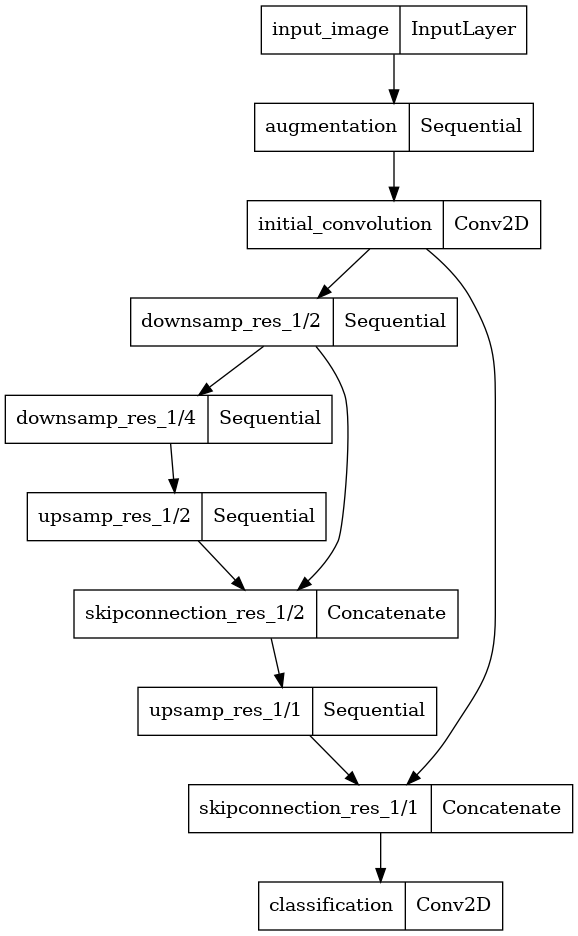

In [7]:
tf.keras.utils.plot_model(unet,to_file='unet.pdf')
# tf.keras.utils.plot_model(unet,to_file='unet.eps') # Can't export to EPS
tf.keras.utils.plot_model(unet,to_file='unet.png')